In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
df_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])
df_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [9]:
#該資料數據類型#
print(df_data.dtypes)
#該資料的矩陣長度#
print(df_data.shape)

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species          float64
dtype: object
(150, 5)


In [10]:
#用於統計字符串裡某個字符出現的次數#
print(df_data.count())

#該資料是否有缺失值#
print(df_data.count()==len(df_data))

SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64
SepalLengthCm    True
SepalWidthCm     True
PetalLengthCm    True
PetalWidthCm     True
Species          True
dtype: bool


In [7]:
X = df_data.drop(labels=['Species'],axis=1).values # 移除Species並取得剩下欄位資料
y = df_data['Species']

K-Means 的演算過程:
初始化：指定K個分群，並隨機挑選K個資料點的值當作群組中心值

分配資料點：將每個資料點設為距離最近的中心

計算平均值：重新計算每個分群的中心點



**Parameters:**

n_cluster: K的大小，也就是分群的類別數量。

random_state: 亂數種子，設定常數能夠保證每次分群結果都一樣。

n_init: 預設為10次隨機初始化，選擇效果最好的一種來作為模型。

max_iter: 迭代次數，預設為300代。

**Attributes:**

inertia: inertia：float，每個點到其他叢集的質心的距離之和。

clustercenters： 特徵的中心點 [n_clusters, n_features]。

**Methods:**

fit: K個集群分類模型訓練。

predict: 預測並回傳類別。

fit_predict: 先呼叫fit()做集群分類，之後在呼叫predict()預測最終類別並回傳輸出。

transform: 回傳的陣列每一行是每一個樣本到kmeans中各個中心點的L2(歐幾里得)距離。

fit_transform: 先呼叫fit()再執行transform()。

In [ ]:
from sklearn.cluster import KMeans

kmeansModel = KMeans(n_clusters=3, random_state=46)
clusters_pred = kmeansModel.fit_predict(X)
y_true = iris.target

評估分群結果
inertia: within cluster sum of squres, 各sample到各該群的centroid的距離之平方和，用來評估cluster的成效，越大代表越差

In [ ]:
kmeansModel.inertia_

78.851441426146

查看各cluster的中心，並在圖上畫出

In [ ]:
kmeansModel.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

真實分類

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


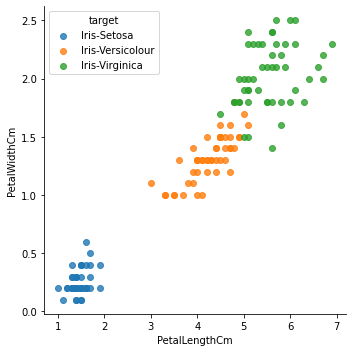

In [ ]:
sns.lmplot("PetalLengthCm", "PetalWidthCm", hue='Species', data=df_data, fit_reg=False, legend=False)
plt.legend(title='target', loc='upper left', labels=['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'])
plt.show()

K-mean 後預測結果

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


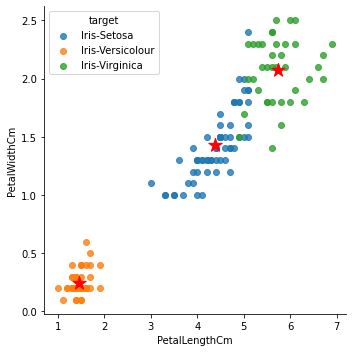

In [ ]:
df_data['Predict']=clusters_pred
sns.lmplot("PetalLengthCm", "PetalWidthCm", data=df_data, hue="Predict", fit_reg=False, legend=False)
plt.scatter(kmeansModel.cluster_centers_[:, 2], kmeansModel.cluster_centers_[:, 3], s=200,c="r",marker='*')
plt.legend(title='target', loc='upper left', labels=['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'])
plt.show()

In [ ]:
print(y_true)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


**Purity指標衡量**

In [ ]:
import numpy as np
from sklearn import metrics

def purity_score(y_true, clusters_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, clusters_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

purity_score(y_true, clusters_pred)

0.8933333333333333

**純度績效為0.8933333333333333，證明分群效果品質良好。**